<a href="https://colab.research.google.com/github/gingerthorp/deepLeaning/blob/master/project/Pro202007_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

In [24]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving 1196178_leaningData.csv to 1196178_leaningData (3).csv
User uploaded file "1196178_leaningData.csv" with length 355598 bytes


In [26]:
df = pd.read_csv(io.StringIO(uploaded['1196178_leaningData.csv'].decode('euc-kr')))

In [27]:
df = df.replace("알수없음", np.nan)    # 알수없음 데이터 결측치로 변경.
df = df.dropna(axis=0) 

In [28]:
target = (df['수익률'] > 0).astype(int).to_numpy()
data = df[list(df)[6:]].astype('float').to_numpy()
genfactor = Bunch(data=data,target=target)

In [36]:
print(genfactor.data.shape, genfactor.target.shape)

(2180, 18) (2180,)


In [37]:
print(np.average(df['수익률']))

1.7393889773713187


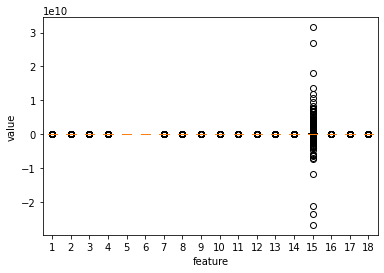

In [30]:
plt.boxplot(genfactor.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [31]:
np.unique(genfactor.target, return_counts=True)

(array([0, 1]), array([ 586, 1594]))

In [32]:
x = genfactor.data
y = genfactor.target

In [54]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)


In [34]:
validation_scores = []

In [35]:
sgd = SGDClassifier(loss='log',penalty='l2', alpha=0.001, random_state=42)
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.7242003284072249


In [47]:
print(np.mean(scores['train_score']))

0.7277655450142693


In [48]:
scores

{'fit_time': array([0.01451182, 0.01835346, 0.02257204, 0.02193022, 0.01488757,
        0.01525187, 0.01413608, 0.02207446, 0.01844668, 0.02382803]),
 'score_time': array([0.00076556, 0.00084162, 0.00091028, 0.00083852, 0.00084686,
        0.00081277, 0.00078988, 0.00114846, 0.00108767, 0.00200486]),
 'test_score': array([0.72571429, 0.70857143, 0.73142857, 0.72571429, 0.72413793,
        0.73563218, 0.72988506, 0.71264368, 0.72988506, 0.7183908 ]),
 'train_score': array([0.72848948, 0.73040153, 0.72912683, 0.73103888, 0.72993631,
        0.72866242, 0.72738854, 0.72229299, 0.72038217, 0.72993631])}

In [62]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean)/train_std

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean)/val_std

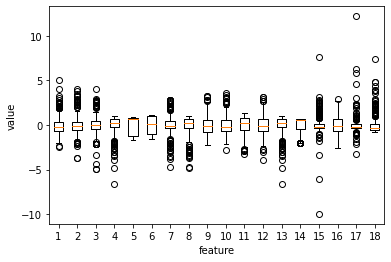

In [63]:
plt.boxplot(x_val_scaled)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [74]:
sgd.fit(x_train_scaled, y_train)
sgd.score(x_train_scaled, y_train)

0.72831541218638

In [72]:
np.unique(sgd.predict(x_val_scaled),return_counts=True)

(array([0, 1]), array([  2, 347]))

In [73]:
np.unique(y_val,return_counts=True)

(array([0, 1]), array([ 94, 255]))

In [75]:
np.unique(genfactor.target, return_counts=True)

(array([0, 1]), array([ 586, 1594]))

In [76]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_scaled = (x - x_mean)/x_std

In [98]:
sgd.fit(x_scaled, y)
sgd.score(x_scaled, y)

0.7178899082568807

In [99]:
np.unique(sgd.predict(x_scaled),return_counts=True)

(array([0, 1]), array([  75, 2105]))

In [102]:
avg = []
count = 0

for i in sgd.predict(x_scaled):
  if i == 0:
    print(df['수익률'][count])
    avg.append(df['수익률'][count])

  count+=1

2.3726668775703894
0.8036739380022963
-1.5800686471771808
1.4084507042253522
5.035971223021583
5.263436800339148
3.716216216216216
0.4995227489659561
3.414634146341464
4.6978771951269165
2.6539278131634823
1.528013582342954
9.79020979020979
-4.563894523326572
-8.436724565756824
2.8180708180708183
1.528773072747014
5.7298772169167815
5.172413793103448
-2.3980815347721824
0.9259259259259258
9.940201315145456
-6.060872934794097
2.1517553793884483
9.608177172061328
0.7187440892755816
2.8684025334271643
9.881422924901186
3.537735849056604
5.10783200908059
1.699859747545582
9.950248756218906
4.185351270553063
-2.48565965583174
0.0
8.285230891719745
-5.518867924528302
10.020556493649512
-7.446808510638298
-10.16260162601626
0.6578947368421052
-0.2967359050445104
9.924623115577887
-3.3816425120772946
4.236006051437216
-3.313871886142856
-3.962614120877797
6.082289803220036
-5.524861878453039
1.9099590723055933
0.8474576271186439
2.833530106257379
0.9505703422053232
9.934784775349106
-4.0650406

In [103]:
np.average(avg)

2.1387196699069233

In [104]:
np.average(df['수익률'])

1.7393889773713187